In [42]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from IPython.display import display

In [43]:
with open('../port_activity_scenario.json') as f:
    data = json.load(f)
    
machines_uses = []
for machine in data["timeseries"]:
    for use in machine["uses"]:
        machine_use = {
            "machineId": machine["machineId"],
            "energyType": machine["consumption"]["energyType"],
            "consumptionPerHour": machine["consumption"]["consumptionPerHour"]
        }
        for key, value in use.items():
            machine_use[key] = value
        machines_uses.append(machine_use)

In [44]:
df = pd.DataFrame.from_dict(machines_uses)
df

,machineId,energyType,consumptionPerHour,startTs,endTs,duration,operationId,operationName,supplychainId,cargoId
0,machine_0,gazole,17,1567760923,1567776696,15773,op_0,unload,sc_4,cargo_51
1,machine_0,gazole,17,1567777226,1567787920,10694,op_1,raise,sc_9,cargo_89
2,machine_0,gazole,17,1567792023,1567809860,17837,op_2,unload,sc_5,cargo_41
3,machine_0,gazole,17,1567816194,1567833017,16823,op_3,drop,sc_2,cargo_78
4,machine_0,gazole,17,1567839212,1567843770,4558,op_4,drop,sc_7,cargo_83
...,...,...,...,...,...,...,...,...,...,...
930,machine_49,gazole,8,1567950375,1567959878,9503,op_930,load,sc_6,cargo_29
931,machine_49,gazole,8,1567962090,1567976757,14667,op_931,load,sc_7,cargo_14
932,machine_49,gazole,8,1567982481,1567999936,17455,op_932,drop,sc_2,cargo_12
933,machine_49,gazole,8,1568001757,1568011192,9435,op_933,filter,sc_3,cargo_52


In [45]:
df["datetimes"] = df.apply(lambda row: pd.date_range(pd.to_datetime(row["startTs"], unit="s"), pd.to_datetime(row["endTs"], unit="s"), freq="1min").to_list(), axis=1)

tsdf = (df
    .set_index([elem for elem in list(df.columns) if elem != "datetimes"])["datetimes"]
    .apply(pd.Series)
    .stack()
    .reset_index()
    .drop('level_10', axis=1)
    .rename(columns={0:'datetime'})
)
tsdf['datetime'] = pd.to_datetime(tsdf['datetime'])
tsdf = tsdf.set_index('datetime')

df.drop(columns=["datetimes"])

tsdf


,machineId,energyType,consumptionPerHour,startTs,endTs,duration,operationId,operationName,supplychainId,cargoId
datetime,,,,,,,,,,
2019-09-06 09:08:43,machine_0,gazole,17,1567760923,1567776696,15773,op_0,unload,sc_4,cargo_51
2019-09-06 09:09:43,machine_0,gazole,17,1567760923,1567776696,15773,op_0,unload,sc_4,cargo_51
2019-09-06 09:10:43,machine_0,gazole,17,1567760923,1567776696,15773,op_0,unload,sc_4,cargo_51
2019-09-06 09:11:43,machine_0,gazole,17,1567760923,1567776696,15773,op_0,unload,sc_4,cargo_51
2019-09-06 09:12:43,machine_0,gazole,17,1567760923,1567776696,15773,op_0,unload,sc_4,cargo_51
...,...,...,...,...,...,...,...,...,...,...
2019-09-09 10:15:21,machine_49,gazole,8,1568017041,1568024362,7321,op_934,drive,sc_9,cargo_74
2019-09-09 10:16:21,machine_49,gazole,8,1568017041,1568024362,7321,op_934,drive,sc_9,cargo_74
2019-09-09 10:17:21,machine_49,gazole,8,1568017041,1568024362,7321,op_934,drive,sc_9,cargo_74


consumptionPerHour        startTs  \
energyType datetime                                                 
diesel     2019-09-06 08:00:00                  77    17245357283   
           2019-09-06 09:00:00                4066   435837570849   
           2019-09-06 10:00:00               12050  1232261794436   
           2019-09-06 11:00:00               11883  1182094254448   
           2019-09-06 12:00:00               11386  1133494390068   
...                                            ...            ...   
gazole     2019-09-09 10:00:00                8291   773032357874   
           2019-09-09 11:00:00                3537   294787367474   
           2019-09-09 12:00:00                2400   188162346420   
           2019-09-09 13:00:00                 975    98785270431   
           2019-09-09 14:00:00                  45     4704060690   

                                        endTs  duration  
energyType datetime                                      
diesel     2019-09-06 08:00:00    17245458483    101200  
           2019-09-06 09:00:00   435840064571   2493722  
           2019-09-06 10:00:00  1232270296176   8501740  
           2019-09-06 11:00:00  1182103710665   9456217  
           2019-09-06 12:00:00  1133504194731   9804663  
...                                       ...       ...  
gazole     2019-09-09 10:00:00   773038337906   5980032  
           2019-09-09 11:00:00   294790240562   2873088  
           2019-09-09 12:00:00   188164321140   1974720  
           2019-09-09 13:00:00    98786369802   1099371  
           2019-09-09 14:00:00     4704113355     52665  

[313 rows x 4 columns]

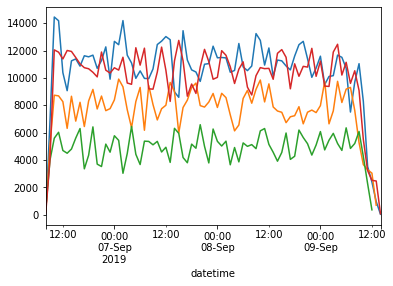

In [46]:
energyTypesDf = tsdf.groupby(['energyType', pd.Grouper(freq='H')]).sum()
display(energyTypesDf)

energyTypes = list(set([row[0] for row in energyTypesDf.index]))
for energyType in energyTypes:
    energyTypesDf.loc[energyType]["consumptionPerHour"].plot(label=energyType)
plt.show()

,consumption
supplychainId,
sc_0,4236.629722
sc_1,3775.192222
sc_2,4755.378056
sc_3,3975.660278
sc_4,4636.501667
sc_5,4788.022222
sc_6,3581.191111
sc_7,4397.998611
sc_8,4452.769722


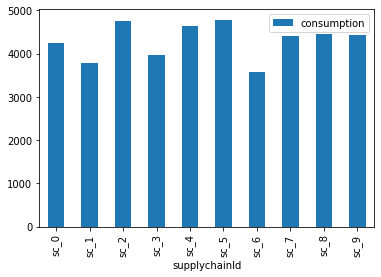

In [47]:
df["consumption"] = df.apply(lambda row: (row["duration"]/60./60)*row["consumptionPerHour"], axis=1)
consumptionDf = df.groupby(['supplychainId']).sum()[["consumption"]]
df.drop(columns=["consumption"])
display(consumptionDf)

consumptionDf.plot.bar()

In [48]:
machinesCount = (
    df
    .groupby(['machineId'])
    .count()
    [['energyType']]
    .rename(columns={'energyType': 'usesCount'})
)
display(machinesCount)

,usesCount
machineId,
machine_0,20
machine_1,18
machine_10,22
machine_11,19
machine_12,21
machine_13,18
machine_14,17
machine_15,20
machine_16,20
